In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('spotify-2023.csv', encoding = 'iso-8859-1')

In [34]:
df.head()

,STT,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,1,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,"141,381,703",...,125,B,Major,80,89,83,31,0,8,4
1,2,LALA,Myke Towers,1,2023,3,23,1474,48,"133,716,286",...,92,C#,Major,71,61,74,7,0,10,4
2,3,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,"140,003,974",...,138,F,Major,51,32,53,17,0,31,6
3,4,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,"800,840,817",...,170,A,Major,55,58,72,11,0,11,15
4,5,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,"303,236,322",...,144,A,Minor,65,23,80,14,63,11,6


In [35]:
df.tail()

,STT,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,949,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,"91,473,363",...,144,A,Major,60,24,39,57,0,8,3
949,950,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,"121,871,870",...,166,F#,Major,42,7,24,83,1,12,6
950,951,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,"73,513,683",...,92,C#,Major,80,81,67,4,0,8,6
951,952,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,"133,895,612",...,97,C#,Major,82,67,77,8,0,12,5
952,953,Alone,Burna Boy,1,2022,11,4,782,2,"96,007,391",...,90,E,Minor,61,32,67,15,0,11,5


In [38]:
df.shape

(953, 25)

In [39]:
df.columns

Index(['STT', 'track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [40]:
df['track_name']

0      Seven (feat. Latto) (Explicit Ver.)
1                                     LALA
2                                  vampire
3                             Cruel Summer
4                           WHERE SHE GOES
                      ...                 
948                           My Mind & Me
949              Bigger Than The Whole Sky
950                   A Veces (feat. Feid)
951                          En La De Ella
952                                  Alone
Name: track_name, Length: 953, dtype: object

In [41]:
df['key'].value_counts()

key
C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: count, dtype: int64

In [42]:
df['artist(s)_name'].value_counts()

artist(s)_name
Taylor Swift                 34
The Weeknd                   22
Bad Bunny                    19
SZA                          19
Harry Styles                 17
                             ..
Karol G, Ovy On The Drums     1
Coolio, L.V.                  1
Kordhell                      1
Kenia OS                      1
Feid, Sech, Jhayco            1
Name: count, Length: 643, dtype: int64

<h3> Xử lý giá trị null <h3>

In [43]:
df.isnull().sum()

STT                      0
track_name               4
artist(s)_name           5
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [44]:
df['in_shazam_charts'].value_counts()

in_shazam_charts
0      344
1       73
2       35
3       21
4       19
      ... 
115      1
230      1
169      1
529      1
95       1
Name: count, Length: 198, dtype: int64

In [45]:
#thay các giá trị null của in_shazam_chars key thành 0
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0)
df['in_shazam_charts']

0      826
1      382
2      949
3      548
4      425
      ... 
948      0
949      0
950      0
951      0
952      0
Name: in_shazam_charts, Length: 953, dtype: object

In [46]:
df['in_shazam_charts'].isnull().sum()

0

In [47]:
#thay các giá trị null của cột key thành C#
df['key'] = df['key'].fillna('C#')
df['key']

0       B
1      C#
2       F
3       A
4       A
       ..
948     A
949    F#
950    C#
951    C#
952     E
Name: key, Length: 953, dtype: object

In [48]:
df['key'].isnull().sum()

0

In [49]:
df = df.dropna(subset=['track_name'])
df = df.dropna(subset=['artist(s)_name'])
df.to_csv('spotify-2023.csv')

In [17]:
#kiểm tra null
df.isnull().sum()

STT                     0
track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

<h3> GIẢM CHIỀU DỮ LIỆU <h3>

In [50]:
year = df['released_year'].value_counts(ascending = False)
before2010 = year[year <=7]
before2010

released_year
2010    7
2002    6
1999    5
1984    4
2000    4
2004    4
1963    3
1958    3
1995    2
1970    2
1959    2
1985    2
1957    2
1986    2
2003    2
1991    2
2008    2
1975    2
1982    2
1946    1
2005    1
1942    1
1996    1
1998    1
1950    1
1979    1
2007    1
1952    1
1971    1
1994    1
1930    1
1973    1
1997    1
1968    1
1992    1
1983    1
1987    1
Name: count, dtype: int64

In [52]:
df['released_year'] = df['released_year'].apply(lambda x: 'Before 2010' if x in before2010 else x)
df

,STT,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,1,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,"141,381,703",...,125,B,Major,80,89,83,31,0,8,4
1,2,LALA,Myke Towers,1,2023,3,23,1474,48,"133,716,286",...,92,C#,Major,71,61,74,7,0,10,4
2,3,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,"140,003,974",...,138,F,Major,51,32,53,17,0,31,6
3,4,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,"800,840,817",...,170,A,Major,55,58,72,11,0,11,15
4,5,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,"303,236,322",...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,949,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,"91,473,363",...,144,A,Major,60,24,39,57,0,8,3
949,950,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,"121,871,870",...,166,F#,Major,42,7,24,83,1,12,6
950,951,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,"73,513,683",...,92,C#,Major,80,81,67,4,0,8,6
951,952,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,"133,895,612",...,97,C#,Major,82,67,77,8,0,12,5


In [51]:
df['released_year'].value_counts()

released_year
2022    400
2023    171
2021    118
2019     36
2020     36
2017     22
2016     18
2014     13
2013     13
2015     11
2018     10
2012     10
2011     10
2010      7
2002      6
1999      5
1984      4
2000      4
2004      4
1963      3
1958      3
1995      2
1970      2
1959      2
1985      2
1957      2
1986      2
2003      2
1991      2
2008      2
1975      2
1982      2
1946      1
2005      1
1942      1
1996      1
1998      1
1950      1
1979      1
2007      1
1952      1
1971      1
1994      1
1930      1
1973      1
1997      1
1968      1
1992      1
1983      1
1987      1
Name: count, dtype: int64

<h3>XỬ LÝ DỮ LIỆU CỘT STREAMS <h3>

In [62]:
# Chuyển đổi cột "streams" sang kiểu chuỗi
df['streams'] = df['streams'].astype(str)

# Loại bỏ dấu phẩy từ chuỗi
df['streams'] = df['streams'].str.replace(',', '')

# Chuyển đổi thành số thực
df['streams'] = df['streams'].astype(float)

<h3>TRỰC QUAN HÓA DỮ LIỆU<h3>

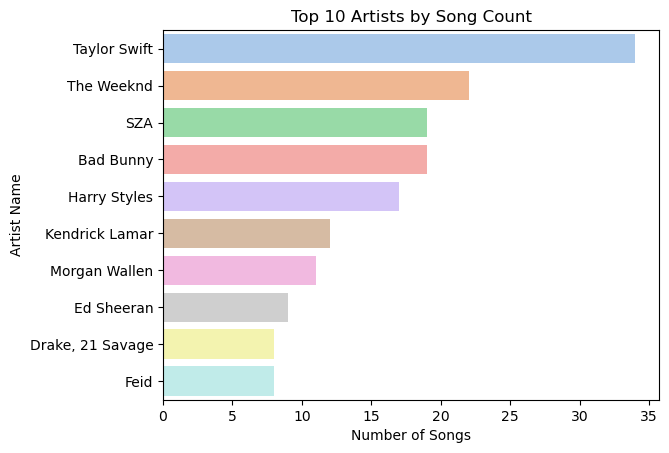

In [53]:
#Top 10 Artists by Song count
top_artists= df.groupby("artist(s)_name").count().sort_values(by='track_name', ascending=False)['track_name'][:10]
sns.barplot(x=top_artists.values, y=top_artists.index, palette='pastel')
plt.title('Top 10 Artists by Song Count')
plt.xlabel('Number of Songs')
plt.ylabel('Artist Name')
plt.show()

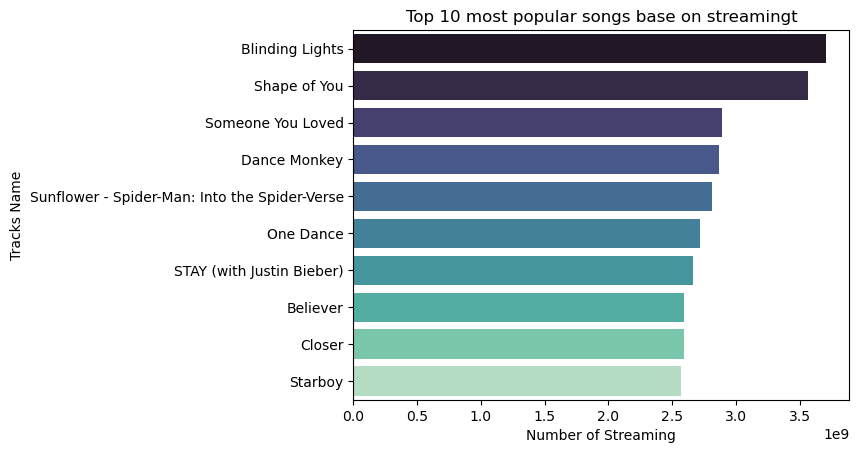

In [75]:
# Top 10 most popular songs base on streaming
top_10_songs = df.sort_values(by ='streams', ascending=False).head(10)
sns.barplot(x='streams', y='track_name', data=top_10_songs, palette='mako')
plt.title('Top 10 most popular songs base on streamingt')
plt.xlabel('Number of Streaming')
plt.ylabel('Tracks Name')
plt.show()

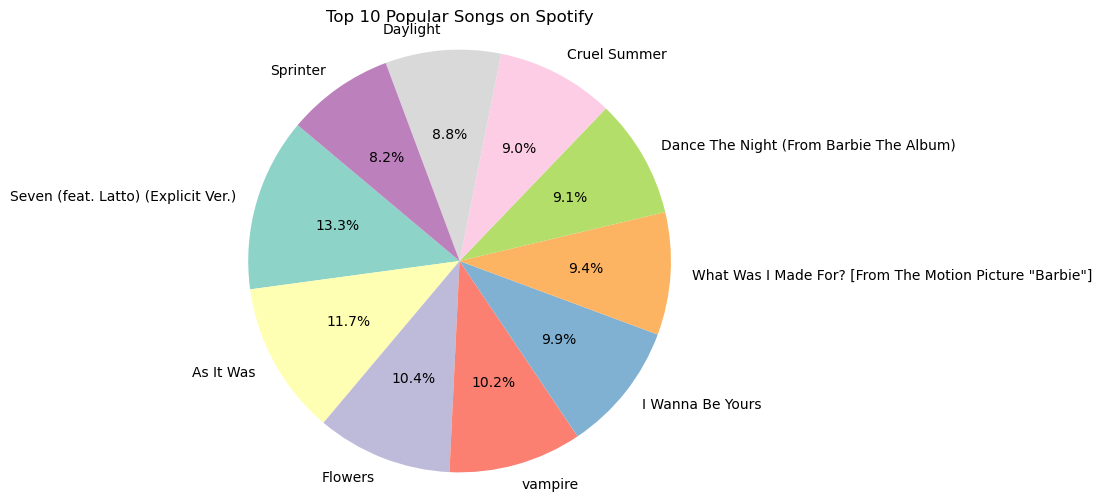

In [95]:
# Top 10 most popular songs in spotify
top_10_sp = df.sort_values(by ='in_spotify_charts', ascending=False).head(10)
plt.figure(figsize=(6, 6))
plt.pie(top_spotify['in_spotify_charts'], labels=top_spotify['track_name'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))

plt.title('Top 10 Popular Songs on Spotify')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()